pandas kütüphanesi ile tarih ve saat serisi verileriyle nasıl çalışılacağını öğreneceğiz. pandas kütüphanesinde tarih ve zaman serileri ile ilgili oldukça güçlü bir işlevsellik bulunmaktadır. pandas serileri, zaman serileri oluşturmak için kullanılmaktadır. pandas kütüphanesini çağırmakla işe koyulalım: 

In [1]:
import pandas as pd

Örnek veri setimiz, ABD'deki UFO ihbarlarını içeren `ufo.csv` dosyası olacaktır. Bu veri setinin son sütunu, her bir ihbarın yapıldığı tarihi ve saati içermektedir. 

In [2]:
ufo = pd.read_csv("https://raw.githubusercontent.com/caniban/MEU_Veri_Bilimi/main/unite%2012%20tarih%20saat%20analizi/ufo.csv")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


İhbarları, yıllara göre ya da gününe göre analiz etmek istersek ne yapmamız gerekir? Öncelikle sütunların veri tiplerine bakalım.

In [3]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

Görüleceği üzere `Time` sütunu object (nesne) veri tipindedir. Diğer bir deyişle, içerisindeki her bir girdi string olarak saklanmaktadır. Bu girdilerin içerisinde tarih ve saat olduğunu görebilmekteyiz. Sadece saat girdisini ele almak istersek, bu stringleri dilimleyerek (slice) saatleri yalnız bırakmaya gereksinme duyarız. 

In [4]:
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

`slice` yöntemi ile dilimleme sayesinde son sütundaki sondan beşinci ve sondan üçüncü karakterler arasındaki karakterleri ayırdık ve `astype` yöntemi ile bu stringleri integer veri tipine çevirdik. 

Ancak, bu şekilde dilimlemek sürdürülebilir bir yöntem değildir. Veri setindeki eksiklikler ya da karakterlerin kayması ile yanlış sonuçlar elde edebiliriz. Bu yüzden, bu kırılgan yöntemi bir kenara bırakıp başka bir yöntem belirlemeliyiz. 

Buradaki en sürdürülebilir yöntem, `Time` sütununu pandas kütüphanesine özgü `datetime` formatına dönüştürmektir. Bu dönüşüm işlemi için `pd.to_datetime()` fonksiyonu kullanılmaktadır. 

In [5]:
ufo['Time'] = pd.to_datetime(ufo.Time)

Veri setini head() yöntemi ile tekrar inceleyelim.

In [6]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


`Time` sütunundaki girdilerin hepsai aynı olmasına rağmen, formatlamada bir tür değişim görülmektedir. Ancak, aslında veri setimizde değişmiş olan, `Time` sütunundaki verilerin tipidir. Görelim; 

In [7]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

Veri girdisinin `6/ 1/1930 22:00` halinden  `1930-06-01 22:00:00` haline dönüşümü için herhangi bir parametre yazmadık. `pd.to_datetime` fonksiyonu bunu otomatik olarak gerçekleştirdi. 

Eğer elinizdeki veri setindeki tarih ve saat girdileri otomatik olarak algılanmıyorsa, fonksiyona parametre eklemek gerekir. `pd.to_datetime` fonksiyonunun [rehberine](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) baktığımızda, format parametresinde yazılacak [kurallar](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) ile bu algılama sağlanacaktır. 

`pd.to_datetime` fonksiyonu kullanıldıktan sonra, `.dt` metodunu kullanarak çeşitli öznitelikleri sorgulayabiliriz. Örneğin saatleri ele alalım: 

In [8]:
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

Veri girdilerindeki tarihlerin, haftanın hangi gününe karşılık geldiğini otomatik bulabilen yöntemi de deneyelim: 

In [9]:
ufo.Time.dt.day_name()

0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
          ...   
18236     Sunday
18237     Sunday
18238     Sunday
18239     Sunday
18240     Sunday
Name: Time, Length: 18241, dtype: object

Buradan 1 Haziran 1930 tarihinin Pazar gününne denk geldiğini görebiliyoruz. 

`dayofyear` özniteliği ile de elimizdeki tarihin yılın kaçıncı gününe denk geldiğini görebiliriz: 

In [10]:
ufo.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

İki tane zaman etiketi (time stamp) belirleyelim. Bunun için değişken ismi atadıktan sonra, pd.to_datetime fonksiyonun içine istediğimiz tarihi string olarak yazabiliriz. 

In [11]:
zaman_1 = pd.to_datetime('1/1/1999')
zaman_2 = pd.to_datetime('1/1/2000')
print(zaman_1)
print(zaman_2)

1999-01-01 00:00:00
2000-01-01 00:00:00


Şimdi, veri setimizin 1999 yılına ait girdilerini filtreleyelim. Bunun için *Time* sütunundaki değerlerin **'1/1/ 1999'** tarihinden büyük, **'1/1/ 2000'** tarihinden küçük olması gerekir: 

In [12]:
ufo[(ufo['Time'] > zaman_1) & (ufo['Time'] < zaman_2)]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
15601,Rockford,ORANGE,LIGHT,IL,1999-12-31 23:30:00
15602,Santee,NaN,FORMATION,CA,1999-12-31 23:42:00
15603,Keys,NaN,OTHER,CA,1999-12-31 23:47:00
15604,Keys,NaN,VARIOUS,CA,1999-12-31 23:48:00


Zaman serileri üzerine aritmetik işlemler de yapabilmek olanaklıdır. Veri setindeki en son tarihli girdiği `.max()` özniteliği ile bulalım: 

In [13]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

Veri setindeki ilk tarihli girdi ile son tarihli girdi arasında kaç gün ve saat bulunduğunu da basit bir aritmetik işlemle bulabiliriz: 

In [14]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

Şimdi de, UFO ihbarlarının **yıllar** içerisinde sayısınının nasıl değiştiğini gösteren bir zaman serisi grafiği çizdirelim: 

In [15]:
%matplotlib inline

ufo['Yıl'] = ufo.Time.dt.year
ufo.head()


,City,Colors Reported,Shape Reported,State,Time,Yıl
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


`Yıl` sütununu elde ettik. Şimdi de value_counts() yöntemini çalıştırarak hangi yılda kaç tane değer (girdi) olduğunu görelim. Çıkan sayımı, index sırasına göre sıralayalım. Son olarak da plot() yöntemi ile çizgi grafiği ekrana verelim. : 

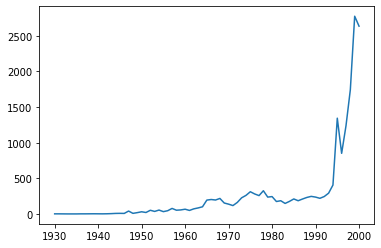

In [16]:
ufo.Yıl.value_counts().sort_index().plot()

## MERSİN IGS İSTASYONU UYGULAMASI

İngilizcesi International GNSS Service olan **IGS**, GNSS verileri ile bu verilerden oluşturulan ürünleri kullanarak jeodezik ve jeofizik amaçlı GNSS uygulamalarını destekleyen ve ilgili standartları belirleyen bir kurumdur. Bunun yanında özellikle mühendislik amaçlı GNSS uygulamalarında da etkin olarak kullanılabilecek olan hassas yörünge bilgileri ve sabit GNSS noktalarına ait verileri tüm kullanıcılara sunabilen bir yapıya sahiptir. IGS bilimsel çalışmalar, jeodezik ve jeofizik uygulamalarında yeterli doğrulukta kullanılabilecek GNSS ölçülerinin toplanması, arşivlenmesi ile  dağıtımı görevini üstlenmiştir. IGS istasyonları, sabit olup sürekli çalışan ve GNSS uydularından gönderilen sinyalleri alıp kayıt edebilen istasyonlardır. 

Mersin Erdemli'de bulunan MERS-IGS istasyonu da, GNSS uydularına bağlanarak kendi anlık konumunu ve elipsoidal yüksekliğini ölçer. MERS_IGS veri setinde, bu istasyonun günlük ortalama konum ve yükseklik çözümlemesi ile kendi bilinen konum ve yüksekliği arasındaki değişimi (residual) gün gün görebileceksiniz. 

Bu veri setini pandas kütüphanesi ile yükleyip, zaman serisi için gereken ön işlemler gerçekleştirelim. 

In [17]:
df=pd.read_csv('https://raw.githubusercontent.com/caniban/MEU_Veri_Bilimi/main/unite%2012%20tarih%20saat%20analizi/MERS_IGS.csv')
df.head()

,epoch,longitude,latitude,height,year,month,day,hour,minute,second
0,2000.700885,-0.274087,-0.310723,0.018408,2000,9,13,11,57,30
1,2000.703623,-0.276360,-0.307785,0.001392,2000,9,14,11,57,30
2,2000.706361,-0.278451,-0.308107,0.004704,2000,9,15,11,57,30
3,2000.709099,-0.276164,-0.308054,0.012086,2000,9,16,11,57,30
4,2000.711836,-0.275760,-0.308764,0.013968,2000,9,17,11,57,30


Veri setinden görüleceği üzere yıl, ay, gün, saat, dakika ve saniye sütunları ayrı ayrı bulunmaktadır. Aynı zamanda, saat-dakika-saniye sütunları da aynı değeri göstermektedir. Demek ki, bu veri seti aslında günlük değerleri gösteren bir veri setidir. Bu sutunları kullanarak zaman serisi oluşturalım: 

In [18]:
# datetime sütununu oluşturalım. gün, ay ve yıl sütunlarındaki tüm string verileri alıp, aralarında tire (-) koyarak yeni sütunumuza aktaralım. 
df['datetime'] = df['day'].map(str) + '-' + df['month'].map(str) + '-' + df['year'].map(str)
# Oluşturduğumuz sütun string veriler içerdiği için, henüz zaman serisi değildir. pd.to_datetime fonksiyonu ile zaman serisine çevirelim.
df['datetime']=pd.to_datetime(df['datetime'])
# Veri setimizin ilk beş satırını tekrar gözden geçirelim. 
df.head()


,epoch,longitude,latitude,height,year,month,day,hour,minute,second,datetime
0,2000.700885,-0.274087,-0.310723,0.018408,2000,9,13,11,57,30,2000-09-13
1,2000.703623,-0.276360,-0.307785,0.001392,2000,9,14,11,57,30,2000-09-14
2,2000.706361,-0.278451,-0.308107,0.004704,2000,9,15,11,57,30,2000-09-15
3,2000.709099,-0.276164,-0.308054,0.012086,2000,9,16,11,57,30,2000-09-16
4,2000.711836,-0.275760,-0.308764,0.013968,2000,9,17,11,57,30,2000-09-17


In [19]:
# Veri setimizin her sütununda bulunan veri tipini inceleyelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3619 entries, 0 to 3618
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   epoch      3619 non-null   float64       
 1   longitude  3619 non-null   float64       
 2   latitude   3619 non-null   float64       
 3   height     3619 non-null   float64       
 4   year       3619 non-null   int64         
 5   month      3619 non-null   int64         
 6   day        3619 non-null   int64         
 7   hour       3619 non-null   int64         
 8   minute     3619 non-null   int64         
 9   second     3619 non-null   int64         
 10  datetime   3619 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 311.1 KB


Zaman serisi hazır olduğuna göre artık görselleştirme işlemine başlayabiliriz. Boylam (Longitude), Enlem (Latidute) ve Yükseklik (Height) değişimlerini tek bir grafik üzerinde ayrı ayrı renklerde çizdirelim.

Grafiğin X ekseni her zaman `datetime` sütunu olacaktır. Y eksenine de sırasıyla boylam, enlem ve yükseklik verileri yerleşecektir.

Grafiğimizin başlığını, eksen isimlerini ve lejantını da unutmayalım: 

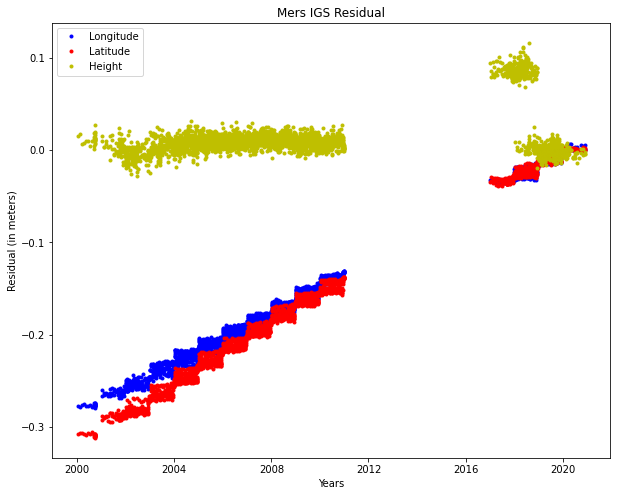

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(df['datetime'], df['longitude'], 'b.', label = 'Longitude')
plt.plot(df['datetime'], df['latitude'], 'r.', label = 'Latitude')
plt.plot(df['datetime'],df['height'],'y.',label='Height')
plt.xlabel('Years'); plt.ylabel('Residual (in meters)'); plt.title('Mers IGS Residual')
plt.legend();
